# Datové struktury

In [ ]:
from IPython.display import HTML

def YVideo(id, t=None):
# Youtube
    if t is None:
        fullStr = f'<iframe width="560" height="315" src="https://www.youtube.com/embed/{id}?rel=0&amp;controls=0&amp;showinfo=0" frameborder="0" allowfullscreen></iframe>'
    else:
        fullStr = f'<iframe width="560" height="315" src="https://www.youtube.com/embed/{id}?start={t}&amp;controls=0&amp;showinfo=0" frameborder="0" allowfullscreen></iframe>'
    return HTML(fullStr)

- Datové struktury
    - Elementární datové struktury
        - Znak
        - Číslo (IEEE 754)
        - Bool
    - Komplexní datové struktury
        - List (Python)
        - Dict (Python)
        - Tree
        - Graph
    - Principiální algoritmy pro práci s datovými strukturami
        - Třídění
        - Vyhledávání 
        - Výpočetní složitost

## Elementární datové struktury

### Čísla

Pravděpodobně historicky první datový prvek ukládaný v počítači. Rozlišujeme celá čísla a čísla s desetinnou čárkou (tečkou). Obecně je vhodné mít na paměti, že jakákoliv data jsou v paměti počítači zakódována v posloupnosti bitů (bytů). Celá čísla se aktuálně používají v podobě, která je adekvátní 2, 4, či 8 bytům.

Čísla s desetinnou čárkou definuje norma IEEE 754 v podobě 4, 8 a 10 bytů.

> Kolik možných kombinací odpovídá 8 bytům?
>
> Kolik různých desetinných čísel znáte?
> 
> Jaké komplikace z této skutečnosti vyplývají?

In [ ]:
end = 0.8
start = 0
delta = 0.1

currentValue = start
index = 0
while currentValue < end:
    print(index, '\t', currentValue)
    currentValue = currentValue + delta
    index = index + 1 

0 	 0
1 	 0.1
2 	 0.2
3 	 0.30000000000000004
4 	 0.4
5 	 0.5
6 	 0.6
7 	 0.7
8 	 0.7999999999999999


In [ ]:
value = 0.1
print(0.125 - value)

0.024999999999999994


Čísla s periodickým vyjádřením

$\frac{1}{3}=0.3333$ ?

> Jaký tvar má číslo 0.1 v paměti za předpokladu, že se jedná o implementaci podle IEEE 754, varianta 8 bytů?
> 

In [ ]:
data = 0.1
cValue = 0.5
while data > 1e-15:
    cValue = cValue / 2
    if data > cValue:
        print('1', end='')
        data = data - cValue
    else:
        print('0', end='')
    

001100110011001100110011001100110011001100110011

[IEEE-754 Floating Point Converter](https://www.h-schmidt.net/FloatConverter/IEEE754.html)

### Znak

Potřeba ukládat text v počítači vedla k vytvoření datového typu znak. Historicky byl znak reprezentován 1 bytem.

> Kolik možných kombinací odpovídá 1 bytu?
> 
> Kolik znaků znáte?
> 
> Jaké komplikace z této skutečnosti vyplývají?
> 
> Jaké řešení bylo implementováno?



In [ ]:
import sys

print(sys.getsizeof(''))
print(sys.getsizeof('A'))
print(sys.getsizeof('Á'))

53
50
74


In [ ]:
print(sys.getsizeof('Á'))
print(sys.getsizeof('ÁB'))
print(sys.getsizeof('ÁČ'))
print(sys.getsizeof('ÁČĎ'))
print(sys.getsizeof('ÁČĎÉ'))

74
75
78
80
82


In [ ]:
text = '\U00000394'
print(sys.getsizeof(text))
print(sys.getsizeof(text + 'Á'))

76
78


## Komplexní datové struktury

> **Doporučené video**
>
> [Data Structures & Algorithms Tutorial 20 dílů](https://www.youtube.com/playlist?list=PLeo1K3hjS3uu_n_a__MI_KktGTLYopZ12)

### List

In [ ]:
data = [0, 1]

Implementace / organizace v paměti počítače (na úrovni strojového kódu). 

Ekvivalence s tabulkou v databázi. Tabulka má záznamy, list má položky.

Role hvězdičky pro práci s listem `*data`

In [ ]:
data = [0, 1, 2, 3, 4]
first, *others, last = data
print(first, others, last)

0 [1, 2, 3] 4


In [ ]:
def printList(*args):
    for arg in args:
        print(arg)

printList(0, 1, 2, 3, 'a', 'b', 'c')
printList([0, 1, 2, 3], ['a', 'b', 'c'])

0
1
2
3
a
b
c
[0, 1, 2, 3]
['a', 'b', 'c']


#### Datové struktury odvozené z listu (array)

- Queue / fronta FIFO [asynchronní fronty](https://docs.python.org/3/library/asyncio-queue.html)
- Stack / zásobník LIFO [asynchronní fronty](https://docs.python.org/3/library/asyncio-queue.html)



#### Queue

In [ ]:
data = []
data.append(1)
data.append(2)
data.append(3)
print(data)
item, *data = data
print(item, data)


[1, 2, 3]
1 [2, 3]


#### Stack

In [ ]:
data = []
data.append(1)
data.append(2)
data.append(3)
print(data)
*data, item = data
print(data, item)

[1, 2, 3]
[1, 2] 3


### Dictionary

In [ ]:
data = {'value': 0}

Množina pojmenovaných hodnot. Podle jazyka mohou být jména omezena.

In [ ]:
data2 = {1: 'ahoj', 'x': 5}
print(data2)

{1: 'ahoj', 'x': 5}


Implementace / organizace v paměti počítače (na úrovni strojového kódu). 

Ekvivalence s tabulkou v databázi. Tabulka má záznamy s unikátním id (klíč), dictionary má (unikátní) klíče a pro každý klíč hodnotu.

Role dvojhvězdičky pro práci s dictionary

In [ ]:
data = {'name': 'John', 'age': 5}
print(data)
newData = {**data, 'age': 6}
print(data)
print(newData)

{'name': 'John', 'age': 5}
{'name': 'John', 'age': 5}
{'name': 'John', 'age': 6}


In [ ]:
def printDict(**kwargs):
    for key, value in kwargs.items():
        print(key, value)

printDict(a=1, b='hi')

a 1
b hi


### Strom

[Wiki](https://en.wikipedia.org/wiki/Tree_(data_structure))

Strom je definován:
- množinou vrcholů (uzlů) 
- kořenovým vrcholem
- funkcí, která každému vrcholu přiřazuje datovou strukturu

Kořenový vrchol nemá rodiče,
každý další vrchol má právě jednoho rodiče.

> **Doporučené video**
>
> [Tree (General Tree) - Data Structures & Algorithms Tutorials In Python #9 23 min](https://www.youtube.com/watch?v=4r_XR9fUPhQ)





In [ ]:
YVideo('4r_XR9fUPhQ')

Knihovna implementující datovou strukturu strom v jazyku Python [treelib](https://github.com/caesar0301/treelib).

In [ ]:
pip install treelib

  Created wheel for treelib: filename=treelib-1.6.1-py3-none-any.whl size=18386 sha256=2eab711f0b8658ab8ba2306b01a564ad892c80875a7f73c61f396a3aa7564315
  Stored in directory: /root/.cache/pip/wheels/89/be/94/2c6d949ce599d1443426d83ba4dc93cd35c0f4638260930a53
Successfully built treelib


In [ ]:
from treelib import Node, Tree
tree = Tree()
tree.create_node("Harry", "harry")  # root node
tree.create_node("Jane", "jane", parent="harry")
tree.create_node("Bill", "bill", parent="harry")
tree.create_node("Diane", "diane", parent="jane")
tree.create_node("Mary", "mary", parent="diane")
tree.create_node("Mark", "mark", parent="jane")
tree.show()

Harry
├── Bill
└── Jane
    ├── Diane
    │   └── Mary
    └── Mark



### Graf

[Wiki](https://en.wikipedia.org/wiki/Graph_(abstract_data_type))

Graf je definován (viz předmět teorie grafů):
- množinou vrcholů (uzlů)
- množinou hran, přičemž hrany jsou svázány se dvěma vrcholy 
- funkcí, která každé hraně (každému vrcholu) přiřazuje datovou strukturu

> **Doporučené video**
>
> [Graph Introduction - Data Structures & Algorithms Tutorials In Python #12 32 min](https://www.youtube.com/watch?v=j0IYCyBdzfA)

In [ ]:
YVideo('j0IYCyBdzfA')

### Třídy

Třídy jsou spojeny s objektovým programováním, kde se zmiňují hlavně tyto pojmy:

- encapsulation / zapouzdření
- inheritance / dědičnost
- polymorfism / mnohotvárnost

Právě zapouzdření je úzce spojeno s datovými strukturami. Zapouzdření zabezpečuje v "jednom pouzdře" všechna data a metody pro práci s nimi.

Pokud se budeme soustředit na pouhá data, uvidíme datovou strukturu, jejíž položky mohou být různého typu. Všimněte si souvislosti s datovým modelem (SQLAlchemy) a s reprezentací datového modelu - tabulkou (v databázi).

In [ ]:
!pip install sqlalchemy

In [ ]:
from sqlalchemy import Column, String, Integer, ForeignKey
from sqlalchemy.orm import relationship, backref
from sqlalchemy.ext.declarative import declarative_base

Base = declarative_base()

class User(Base):
    __tablename__ = 'users'

    id = Column(Integer, primary_key=True)
    name = Column(String(200), nullable=False)
    surname = Column(String(200), nullable=False)
    


### Další typy (Python)

- Tuple
- Named Tuple

In [ ]:
data = (12, 23, 78)
print(data)

(12, 23, 78)


In [ ]:
def funct(a, b):
    c = a + b
    d = a * b
    return (c, d)

### Koncept Immutable

Immutable datová struktura je datová struktura, kterou nelze změnit. V programu tedy (v extrému) existují jen konstanty.

**Redux** - knihovna, která na konceptu staví řešení pro správu dat ve webové aplikaci.

Příklad, který je konceptem řešen.

In [ ]:
def changeName(data, value):
    data['name'] = value
    return data

input = {'name': 'John'}
result = changeName(input, 'Julie')
print('result', result)
print('input', input)

result {'name': 'Julie'}
input {'name': 'Julie'}


Řešení v duchu konceptu immutable

In [ ]:
def changeName(data, value):
    result = {**data, 'name': value}
    return result

input = {'name': 'John'}
result = changeName(input, 'Julie')
print('result:', result)
print('input:', input)

result: {'name': 'Julie'}
input: {'name': 'John'}


Side effect functions - funkce s vedlejšími efekty je funkce, při svém běhu změní i hodnoty mimo tělo funkce. Velmi často jsou takové funkce i závislé na hodnotách externích proměnných. Funkce se závislostí na vnějším prostředí je velmi obtížně testovatelnou funkcí. Proto je potencionálním chybovým místem v kódu. Navíc se tyto chyby velmi špatně hledají.

**Pozor**

V jazyku Python lze i funkci chápat (a použít) jako proměnnou. Jinak řečeno, do názvu, který reprezentuje funkci lze uložit jinou funkci (i číslo). 

In [ ]:
def add(a, b):
    return a + b

add = lambda c, d: c * d

print(add(2, 3))

6


In [ ]:
def add(a, b):
    return a + b

def sum(dataArray):
    acc = 0
    for item in dataArray:
        acc = add(acc, item)
    return acc

print(sum([0, 1, 2, 3, 4]))
add = lambda c, d: c * d # nova definice add, chovani sum se zmeni
print(sum([0, 1, 2, 3, 4]))

10
0


## Principiální algoritmy pro práci s datovými strukturami

### Předávání parametrů funkci

In [ ]:
def inc(value):
    value = value + 1
    return value

input = 5
result = inc(input)
print('result:', result)
print('input:', input)

result: 6
input: 5


Srovnejte s funkcí `changeName` definované výše. 

>
> **Jak si vysvětlíte skutečnost, že obdobné funkce fungují odlišně?**
>

### Algoritmus třídění

#### Bubble Sort

https://www.geeksforgeeks.org/python-program-for-bubble-sort/

In [ ]:
# taken from https://www.geeksforgeeks.org/python-program-for-bubble-sort/
# Python program for implementation of Bubble Sort

def bubbleSort(arr):
	n = len(arr)

	# Traverse through all array elements
	for i in range(n-1):
	# range(n) also work but outer loop will repeat one time more than needed.

		# Last i elements are already in place
		for j in range(0, n-i-1):

			# traverse the array from 0 to n-i-1
			# Swap if the element found is greater
			# than the next element
			if arr[j] > arr[j + 1] :
				arr[j], arr[j + 1] = arr[j + 1], arr[j]

# Driver code to test above
arr = [64, 34, 25, 12, 22, 11, 90]

bubbleSort(arr)

print ("Sorted array is:")
for i in range(len(arr)):
	print ("% d" % arr[i]),


Sorted array is:
 11
 12
 22
 25
 34
 64
 90


#### Merge Sort

https://www.geeksforgeeks.org/merge-sort/

In [ ]:
# taken from https://www.geeksforgeeks.org/merge-sort/
# Python program for implementation of MergeSort
def mergeSort(arr):
    if len(arr) > 1:
  
         # Finding the mid of the array
        mid = len(arr)//2
  
        # Dividing the array elements
        L = arr[:mid]
  
        # into 2 halves
        R = arr[mid:]
  
        # Sorting the first half
        mergeSort(L)
  
        # Sorting the second half
        mergeSort(R)
  
        i = j = k = 0
  
        # Copy data to temp arrays L[] and R[]
        while i < len(L) and j < len(R):
            if L[i] < R[j]:
                arr[k] = L[i]
                i += 1
            else:
                arr[k] = R[j]
                j += 1
            k += 1
  
        # Checking if any element was left
        while i < len(L):
            arr[k] = L[i]
            i += 1
            k += 1
  
        while j < len(R):
            arr[k] = R[j]
            j += 1
            k += 1

# Driver code to test above
arr = [64, 34, 25, 12, 22, 11, 90]

mergeSort(arr)

print ("Sorted array is:")
for i in range(len(arr)):
	print ("% d" % arr[i]),


Sorted array is:
 11
 12
 22
 25
 34
 64
 90


#### Shell Sort

https://www.geeksforgeeks.org/python-program-for-shellsort/

In [ ]:
# taken from https://www.geeksforgeeks.org/python-program-for-shellsort/ (improved)
def shellSort(arr):
  
    # Start with a big gap, then reduce the gap
    n = len(arr)
    n = n - n % 2
    gap = n // 2
  
    # Do a gapped insertion sort for this gap size.
    # The first gap elements a[0..gap-1] are already in gapped 
    # order keep adding one more element until the entire array
    # is gap sorted
    while gap > 0:
  
        for i in range(gap, n):
  
            # add a[i] to the elements that have been gap sorted
            # save a[i] in temp and make a hole at position i
            temp = arr[i]
  
            # shift earlier gap-sorted elements up until the correct
            # location for a[i] is found
            j = i
            while  j >= gap and arr[j-gap] >temp:
                arr[j] = arr[j-gap]
                j -= gap
  
            # put temp (the original a[i]) in its correct location
            arr[j] = temp

        if gap == 1:
            break
        gap = gap - gap % 2
        gap = gap // 2

# Driver code to test above
arr = [64, 34, 25, 12, 22, 11, 90]

shellSort(arr)

print ("Sorted array is:")
for i in range(len(arr)):
	print ("% d" % arr[i]),

Sorted array is:
 11
 12
 22
 25
 34
 64
 90


> **Doporučené video**
> 
> [Srovnání algoritmů třídění](https://youtu.be/GIvjJwzrHBU?t=789)

In [ ]:
YVideo('GIvjJwzrHBU', t=789)

### Přístup k rozsáhlým datovým strukturám

Hra / sázka. Pomocí deseti otázek, na které lze odpovědět ano/ne, zjistím jaké číslo z rozsahu 0-1000 (1023) si protivník myslí. Jakým způsobem?

**Důsledek**

> 
> Datové struktury v databázi mají primární, unikátní klíč
> 

**Otázka**

>
> Kolik "otázek" je potřeba pro nalezení záznamu pomocí jeho ID v tabulce o velikosti 4TB s očekávanou délkou záznamu 1kB?
>

Binární strom

In [ ]:
def quess(low, high):
    if low == high:
        return f'it is {low}'

    middle = (low + high) // 2
    q = input(f'it is lower than {middle}? ')
    if q in ['1', 'A', 'a', 'Y', 'y']:
        result = quess(low, middle - 1)
    else:
        result = quess(middle, high)

    return result


print('save a value from inteval <0; 1023>')
val = quess(0, 1023)
print(val)

quess value in inteval <0; 1023>
it is lower than 511?y
it is lower than 255?n
it is lower than 382?n
it is lower than 446?y
it is lower than 413?n
it is lower than 429?y
it is lower than 420?n
it is lower than 424?y
it is lower than 421?n
it is lower than 422?y
it is 421


In [ ]:
def createDecisionTree(low, high):
    if low == high:
        return lambda value: f'It is {value}'
    else:
        middle = (low + high) // 2
        #print(low, middle, high)
        leftBranch = createDecisionTree(low, middle)
        rightBranch = createDecisionTree(middle + 1, high)
        return lambda value: leftBranch(value) if value < middle else rightBranch(value)

decisionTree = createDecisionTree(0, 1023)
decisionTree(421)

'It is 421'

In [ ]:
def createFinder(sortedList):
    lastIndex = len(sortedList) - 1
    if lastIndex == 0:
        return lambda value, offset = 0: offset
    else:
        middleIndex = len(sortedList) // 2 
        #print(0, middleIndex, lastIndex, sortedList)
        valueAt = sortedList[middleIndex]
        leftFinder = createFinder(sortedList[:middleIndex])
        rightFinder = createFinder(sortedList[middleIndex:])
        #return lambda value, offset = 0: rightFinder(value, offset + middleIndex) if value > valueAt else leftFinder(value, offset)
        return lambda value, offset = 0:  leftFinder(value, offset) if value < valueAt else rightFinder(value, offset + middleIndex)

inputList = [0, 25, 59, 123, 785, 899, 1000]
finder = createFinder(inputList)
for item in inputList:
    print(item, '->', finder(item))

0 -> 0
25 -> 1
59 -> 2
123 -> 3
785 -> 4
899 -> 5
1000 -> 6


In [ ]:
%%timeit
for item in inputList:
    _ = finder(item)

The slowest run took 4.69 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 5: 3.57 µs per loop


In [ ]:
%%timeit
for item in inputList:
    _ = inputList.index(item)

The slowest run took 4.63 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 5: 1.41 µs per loop


Vytvořte vyhledávání bez využití `index`. Kód doplňte do následující funkce.

In [ ]:
def myIndex(data=[0, 1, 2, 3], value=2):
    for index, item in zip(data, range(len(data))):
        if item == value:
            return index

print([0, 1, 2, 3].index(2))
print(myIndex())
data=[0, 1, 2, 3]
for item in data:
    print(item, '->', myIndex(data, item))

2
2
0 -> 0
1 -> 1
2 -> 2
3 -> 3


Ověřte si rychlost implementovaného algoritmu

In [ ]:
%%timeit
for item in inputList:
    _ = myIndex(inputList, item)

The slowest run took 4.71 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 5: 883 ns per loop


## Komplexní příklad

### Načtení dat

In [102]:
import json

with open('rozvrh/data.json') as inputFile:
    data = json.load(inputFile)

### Určení úplné velikosti v paměti

In [103]:
import sys

def get_size(obj, seen=None):
    """Recursively finds size of objects"""
    size = sys.getsizeof(obj)
    if seen is None:
        seen = set()
    obj_id = id(obj)
    if obj_id in seen:
        return 0
    # Important mark as seen *before* entering recursion to gracefully handle
    # self-referential objects
    seen.add(obj_id)
    if isinstance(obj, dict):
        size += sum([get_size(v, seen) for v in obj.values()])
        size += sum([get_size(k, seen) for k in obj.keys()])
    elif hasattr(obj, '__dict__'):
        size += get_size(obj.__dict__, seen)
    elif hasattr(obj, '__iter__') and not isinstance(obj, (str, bytes, bytearray)):
        size += sum([get_size(i, seen) for i in obj])
    return size

In [104]:
get_size(data)

95065442

### Prvotní náhled na data

In [105]:
data.keys()

dict_keys(['events', 'occurrencesDays', 'timeslots', 'colors', 'subjects', 'departments', 'groups', 'entryYears', 'students', 'teachers', 'classrooms', 'areas', 'categories', 'spheres', 'lessonForms'])

In [106]:
groups = data['groups']
print(len(groups))
for index, item in enumerate(groups):
    print(item)
    if index > 10:
        break

255
{'id': 'C46070D0-9837-11EB-9B9F-AD3400000000', 'name': '11-2BO', 'entryYearId': 2021}
{'id': '48D17850-9838-11EB-9B9F-AD3400000000', 'name': '11-2BO-C-K', 'entryYearId': 2021}
{'id': '15168500-9838-11EB-9B9F-AD3400000000', 'name': '11-2BO-K', 'entryYearId': 2021}
{'id': '7DEF7A90-7769-11EB-86B6-AD3400000000', 'name': '11-3BO', 'entryYearId': 2021}
{'id': '9D343D50-7769-11EB-86B6-AD3400000000', 'name': '11-3BO-K', 'entryYearId': 2021}
{'id': 'B07D4A70-7767-11EB-86B6-AD3400000000', 'name': '11-5RPOS1', 'entryYearId': 2021}
{'id': '52ACC2D0-7768-11EB-86B6-AD3400000000', 'name': '11-5RPOS2', 'entryYearId': 2021}
{'id': '71DCEC20-7768-11EB-86B6-AD3400000000', 'name': '11-5RPOS3', 'entryYearId': 2021}
{'id': '8D49A4D0-7768-11EB-86B6-AD3400000000', 'name': '11-5RPOS4', 'entryYearId': 2021}
{'id': 'A81BCB30-7768-11EB-86B6-AD3400000000', 'name': '11-5RPOS5', 'entryYearId': 2021}
{'id': 'C7AB5290-7768-11EB-86B6-AD3400000000', 'name': '11-5RPOS6', 'entryYearId': 2021}
{'id': 'EDF9B040-7768-11

> **Co byste na seznamu skupin vylepšili?**

In [12]:
lessonForms = data['lessonForms']
for index, item in enumerate(lessonForms):
    print(item)
    if index > 10:
        break

{'id': 1, 'name': 'přednáška', 'shortName': 'P', 'colorId': 2}
{'id': 2, 'name': 'cvičení', 'shortName': 'CV', 'colorId': 17}
{'id': 3, 'name': 'seminář', 'shortName': 'SEM', 'colorId': 6}
{'id': 4, 'name': 'laboratorní cvičení', 'shortName': 'LAB', 'colorId': 13}
{'id': 5, 'name': 'polní výcvik', 'shortName': 'PV', 'colorId': 4}
{'id': 6, 'name': 'exkurze', 'shortName': 'EX', 'colorId': 10}
{'id': 7, 'name': 'praxe', 'shortName': 'PX', 'colorId': 10}
{'id': 8, 'name': 'kurz', 'shortName': 'KRZ', 'colorId': 8}
{'id': 9, 'name': 'stáž', 'shortName': 'STŽ', 'colorId': 10}
{'id': 11, 'name': 'terén', 'shortName': 'TER', 'colorId': 4}
{'id': 12, 'name': 'samostatná práce', 'shortName': 'SMP', 'colorId': 18}
{'id': 13, 'name': 'konzultace', 'shortName': 'KON', 'colorId': 6}


In [13]:
spheres = data['spheres']
for index, item in enumerate(spheres):
    print(item)
    if index > 10:
        break

{'id': 1, 'name': 'studium'}
{'id': 2, 'name': 'ostatní'}


In [14]:
print(data['events'][0])

{'id': '2D2B1C90-F4FF-11EB-9B74-520D00000000', 'typeId': 'F00CB650-9768-11EB-87D2-030800000000', 'startTime': {'hours': 14, 'minutes': 30}, 'endTime': {'hours': 16, 'minutes': 0}, 'dateCode': '2021-11-15', 'date': {'day': 15, 'month': 11, 'year': 2021}, 'categoryId': 1, 'subjectId': 32269, 'subjectName': 'Letecké elektronické systémy II', 'departmentId': 441, 'departmentName': 'FVT-K206', 'topic': '3. Syntéza kmitočtu ', 'topicId': 62645, 'masterId': '62645/2', 'timeslotsId': 1, 'timeslotsName': 'BR', 'lessonOrder': 8, 'lessonFormId': 2, 'lessonFormName': 'CV', 'lessonUnit': 45, 'lessonsCount': 2, 'groupsIds': ['A8CFD4D0-8CA4-11EB-BA48-520D00000000'], 'groupsNames': ['23-3LT-AV-C'], 'groupsEntryYearsIds': [], 'classroomsIds': [331], 'classroomsNames': ['Č1/120'], 'classroomsAreasIds': [2], 'teachersIds': [540], 'teachersNames': ['Němeček, Jiří'], 'teachersDepartmentsIds': [441], 'isLocked': True}


> **Najděte duplicitu v datech**

### Datové struktury v datech :)

Elementární datové typy:

- Čísla (např. id u typu lekce)
- Znaky / řetezce (např. name u typu lekce)

Komplexní datové struktury:

- List (např. seznam typů lekcí)
- Dictionary (např. type lekce)
- Strom? Strom!
- Graf? Graf!
- Třída?

### Modely datových struktur

In [17]:
!pip install sqlalchemy

In [107]:
from sqlalchemy import Column, String, Integer, Boolean, ForeignKey
from sqlalchemy.orm import relationship, backref
from sqlalchemy.ext.declarative import declarative_base

Base = declarative_base()

In [108]:
groups = data['groups']
groups[0]

{'id': 'C46070D0-9837-11EB-9B9F-AD3400000000',
 'name': '11-2BO',
 'entryYearId': 2021}

In [27]:
class Group(Base):
    __tablename__ = 'groups'

    id = Column(String(36), primary_key=True)
    name = Column(String(200), nullable=False)
    entryYearId = Column(Integer, nullable=False)

In [28]:
lessonForms = data['lessonForms']
lessonForms[0]

{'id': 1, 'name': 'přednáška', 'shortName': 'P', 'colorId': 2}

In [29]:
class LessonForm(Base):
    __tablename__ = 'lessonforms'

    id = Column(Integer, primary_key=True)
    name = Column(String(30), nullable=False)
    shortName = Column(String(10), nullable=False)
    colorId = Column(Integer, nullable=False)

In [30]:
timeslots = data['timeslots']
timeslots[0]

{'id': 1,
 'name': 'Brno',
 'shortName': 'BR',
 'lessonUnit': 45,
 'slotUnit': 90,
 'definition': [480, 20, 20, 80, 20, 40],
 'default': True}

In [31]:
class TimeSlot(Base):
    __tablename__ = 'timeslots'

    id = Column(Integer, primary_key=True)
    name = Column(String(30), nullable=False)
    shortName = Column(String(10), nullable=False)
    lessonUnit = Column(Integer, nullable=False)
    slotUnit = Column(Integer, nullable=False)
    definition = Column(String(200), nullable=False)
    default = Column(Boolean, nullable=False)

### FastAPI :)

In [109]:
!pip install fastapi

In [110]:
import uvicorn
from fastapi import FastAPI

app = FastAPI()#root_path='/api')

def run():
    uvicorn.run(app, port=9992, host='0.0.0.0', root_path='')

In [111]:
# Code in this cell is just for (re)starting the API on a Process, and other compatibility stuff with Jupyter cells.
# Just ignore it!

from multiprocessing import Process
from wait4it import wait_for

_api_process = None

def start_api(runNew=True):
    """Stop the API if running; Start the API; Wait until API (port) is available (reachable)"""
    global _api_process
    if _api_process:
        _api_process.terminate()
        _api_process.join()
    
    if runNew:
        _api_process = Process(target=run, daemon=True)
        _api_process.start()
        wait_for(port=9992)

def delete_all_routes():
    rr = [*app.routes]
    for item in rr:
        app.routes.remove(item)

Funkce pro vytvoření endpointu pro přístup k prvkům uloženým v listu pod klíčem.

In [112]:
from fastapi import HTTPException
def createEndPoint(dataSource, itemName, idName, app=app):
    subData = dataSource[itemName]
    ids = [str(item[idName]) for item in subData]
    @app.get(f'/{itemName}' + '/{id}')
    async def resultGet(id):
        try:
            indexOf = ids.index(str(id))
        except ValueError:
            raise HTTPException(status_code=404, detail="Item not found")
        return subData[indexOf]
    
    @app.get(f'/{itemName}/')
    async def resultGetAll(skip: int = 0, limit: int = 10):
        return subData[skip : skip + limit]

Funkce pro přeskočení stanoveného počtu prvků a funkce pro omezení na stanovený počet prvků (v enumerovatelném objektu).

In [91]:
def skipThem(data, skip):
    iteratedData = iter(data)
    if skip > 0: # pozor na nulu, bez tohoto testu by doslo ke zniceni sekvence
        for index, item in enumerate(iteratedData):
            if index == skip - 1:
                break
    
    for item in iteratedData:
        yield item
            
def takeThem(data, take):
    for index, item in enumerate(data):
        yield item
        if index == take - 1:
            break    
            
inputData = list(range(100))
servedData = takeThem(skipThem(inputData, 10), 10)
print(list(servedData))

[10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


Funkce, která vytvoří pro `app` endpoint typu GET na adrese definované parametery vnější funkce `itemName` a `filterItemName`. Tyto dva parametry definují cestu a jsou definovány předem. Dále je zde parametr vnitřní funkce `value`, jehož hodnota je dána požadavkem uživatele. Ve vnitřní funkci je provedeno hledání položek, jejichž key s názvem `filterName` má hodnotu `value`. Seznam je dále limitován a výsledek je vrácen. FastAPI zabezpečí konverzi do datového paketu, který je odeslán jako odpověď na požadavek uživatele.

In [113]:
def createFilteredEndPointExact(dataSource, itemName, idName, filterItemName, app=app):
    subData = dataSource[itemName]
    ids = [str(item[idName]) for item in subData]

    @app.get(f'/{itemName}/{filterItemName}' + '/{value}')
    async def resultGetAll(value, skip: int = 0, limit: int = 10):
        filterFunc = lambda item: item[filterItemName] == value
        filteredData =  filter(filterFunc, subData)
        skippedData = skipThem(filteredData, skip)
        limitedData = takeThem(skippedData, limit)
        return list(limitedData)
    

Obdobně jako v předchozí části, jen jen testováno, zda pole uložené pod klíčem `filterItemName` obsahuje hodnotu `value`.

In [114]:
def createFilteredEndPointCollection(dataSource, itemName, filterItemName, app=app):
    subData = dataSource[itemName]

    @app.get(f'/{itemName}/{filterItemName}' + '/{value}')
    async def resultGetAll(value, skip: int = 0, limit: int = 10):
        f'Filter from source {itemName} by value. It is checked if value is in {filterItemName}'
        #print(f'query on {itemName}.{filterItemName} for value "{value}"')
        filterFunc = lambda item: value in item[filterItemName]
        filteredData =  filter(filterFunc, subData)
        skippedData = skipThem(filteredData, skip)
        limitedData = takeThem(skippedData, limit)
        #result = list(limitedData)
        #print(result)
        return limitedData

Obnovení dat / nahrání dat

In [115]:
with open('rozvrh/data.json') as inputFile:
    data = json.load(inputFile)
for key, value in data.items():
    print(f'data[{key}]')

data[events]
data[occurrencesDays]
data[timeslots]
data[colors]
data[subjects]
data[departments]
data[groups]
data[entryYears]
data[students]
data[teachers]
data[classrooms]
data[areas]
data[categories]
data[spheres]
data[lessonForms]


Definice App, endpointů a spuštění API.

In [116]:
#delete_all_routes()
app = FastAPI()
for key, value in data.items():
    createEndPoint(dataSource=data, itemName=key, idName='id', app=app)

filtersDescriptionArray = {
    'events': ['teachersDepartmentsIds', 'teachersIds', 'groupsIds', 'groupsNames']
}
for key, filteringItems in filtersDescriptionArray.items():
    for item in filteringItems:
        print(f'Adding an endpoint for query events.{item}')
        createFilteredEndPointCollection(dataSource=data, itemName='events', filterItemName=item, app=app)
        
start_api(runNew=True)

Adding an endpoint for query events.teachersDepartmentsIds
Adding an endpoint for query events.teachersIds
Adding an endpoint for query events.groupsIds
Adding an endpoint for query events.groupsNames


INFO:     Started server process [482]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://0.0.0.0:9992 (Press CTRL+C to quit)


INFO:     172.18.0.1:37010 - "GET /events/groupsNames/23-5KB?skip=0&limit=10 HTTP/1.1" 200 OK


INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [482]


In [117]:
start_api(runNew=False)

In [100]:
def createFilteredEndPointCollectionTest(dataSource, itemName, filterItemName):
    subData = dataSource[itemName]

    def resultGetAll(value, skip: int = 0, limit: int = 10):
        f'Filter from source {itemName} by value. It is checked if value is in {filterItemName}'
        print(f'query on {itemName}.{filterItemName} for value "{value}"')
        filterFunc = lambda item: value in item[filterItemName]
        filteredData =  filter(filterFunc, subData)
        skippedData = skipThem(filteredData, skip)
        limitedData = takeThem(skippedData, limit)
        result = list(limitedData)
        #print(result)
        return result 
    return resultGetAll

allData = createFilteredEndPointCollectionTest(data, 'events', 'groupsNames')('23-5KB')
print(allData)

## Samostatné cvičení

### Krátké

> **Načtěte data ze souboru (rozvrh)**

> **Zjistěte seznam datových struktur (klíče z načteného dictionary)**

> **Určete počet prvků v seznamu událostí**

> **Seřaďte události podle id a vytvořte z nich nový seznam**

> **Ověřte oddělenost událostí (datových struktur) v původním seznamu a nově vytvořeném seznamu**

> **Vyhledejte událost s daným id**

> **Vyhledejte události, které začínají v 8:00, zjistěte jejich počet**

### Dlouhé

> **Vytvořte homogenní strukturu pro vykreslení rozvrhu**

> **Reprezentuje výběr jako kalendář na A4**

## Nápovědy

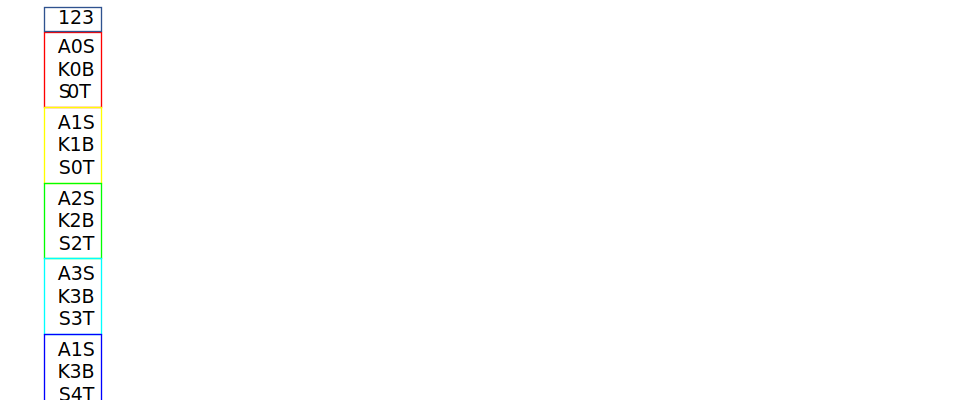

In [2]:
from IPython.display import SVG
data = """
<svg width="960" height="400" xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink" overflow="hidden">
<defs><clipPath id="clip0"><rect x="0" y="0" width="960" height="720"/></clipPath></defs>
<g clip-path="url(#clip0)">
<rect x="0" y="0" width="960" height="720" fill="#FFFFFF"/>
<text font-family="Calibri,Calibri_MSFontService,sans-serif" font-weight="400" font-size="19" transform="translate(57.652 53)">A0S<tspan font-size="19" x="-0.0424118" y="23">K0B</tspan><tspan font-size="19" x="1.04089" y="45">S</tspan><tspan font-size="19" x="9.5409" y="45">0</tspan>T</text>
<rect x="44.5001" y="32.5001" width="57" height="75" stroke="#FF0000" stroke-width="1.33333" stroke-miterlimit="8" fill="none"/>
<rect x="44.5001" y="7.50005" width="57" height="24" stroke="#2F528F" stroke-width="1.33333" stroke-miterlimit="8" fill="none"/>
<text font-family="Calibri,Calibri_MSFontService,sans-serif" font-weight="400" font-size="19" transform="translate(57.652 129)">A1S<tspan font-size="19" x="-0.0424118" y="22">K1B</tspan><tspan font-size="19" x="1.04089" y="45">S0T</tspan></text><rect x="44.5001" y="107.5" width="57" height="76" stroke="#FFFF00" stroke-width="1.33333" stroke-miterlimit="8" fill="none"/><text font-family="Calibri,Calibri_MSFontService,sans-serif" font-weight="400" font-size="19" transform="translate(57.652 205)">A2S<tspan font-size="19" x="-0.0424118" y="22">K2B</tspan><tspan font-size="19" x="1.04089" y="45">S2T</tspan></text>
<rect x="44.5001" y="183.5" width="57" height="75" stroke="#00FF00" stroke-width="1.33333" stroke-miterlimit="8" fill="none"/><text font-family="Calibri,Calibri_MSFontService,sans-serif" font-weight="400" font-size="19" transform="translate(57.652 280)">A3S<tspan font-size="19" x="-0.0424118" y="23">K3B</tspan><tspan font-size="19" x="1.04089" y="45">S3T</tspan></text><rect x="44.5001" y="258.5" width="57" height="76" stroke="#00FFFF" stroke-width="1.33333" stroke-miterlimit="8" fill="none"/><text font-family="Calibri,Calibri_MSFontService,sans-serif" font-weight="400" font-size="19" transform="translate(57.652 356)">A1S<tspan font-size="19" x="-0.0424118" y="22">K3B</tspan><tspan font-size="19" x="1.04089" y="45">S4T</tspan></text><rect x="44.5001" y="334.5" width="57" height="75" stroke="#0000FF" stroke-width="1.33333" stroke-miterlimit="8" fill="none"/><text font-family="Calibri,Calibri_MSFontService,sans-serif" font-weight="400" font-size="19" transform="translate(58.082 24)">123</text></g></svg>"""
SVG(data)

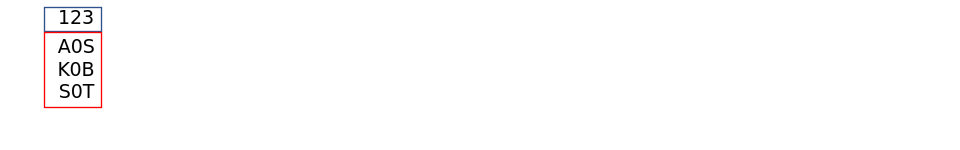

In [36]:
from IPython.display import SVG
SVGHeader = '<svg width="960" height="150" xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink" overflow="hidden">'
SVGFooter = '</svg>'
SVGBigRect = '<rect x="44.5001" y="32.5001" width="57" height="75" stroke="#FF0000" stroke-width="1.33333" stroke-miterlimit="8" fill="none"/>'
SVGBigText = '''
<text font-family="Calibri,Calibri_MSFontService,sans-serif" font-weight="400" font-size="19" transform="translate(57.652 53)">A0S<tspan font-size="19" x="-0.0424118" y="23">K0B</tspan>
<tspan font-size="19" x="1.04089" y="45">S0T</tspan></text>'''
SVGSmallRect = '<rect x="44.5001" y="7.50005" width="57" height="24" stroke="#2F528F" stroke-width="1.33333" stroke-miterlimit="8" fill="none"/>'
SVGSmallText = '<text font-family="Calibri,Calibri_MSFontService,sans-serif" font-weight="400" font-size="19" transform="translate(58.082 24)">123</text>'

data = SVGHeader + '<g>' + SVGSmallRect + SVGSmallText + SVGBigRect + SVGBigText + '</g>' + SVGFooter
SVG(data)

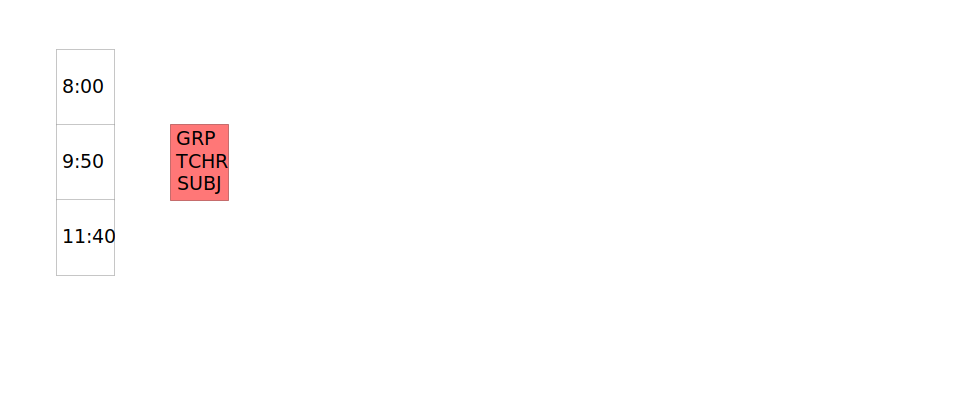

In [34]:
from IPython.display import SVG

def displayItem(item, col, mainRow, subRow, name1, name2, name3, color='#FF0000'):
    smallRowHeight = 25
    bigRowHeight = 75
    mainRowHeight = smallRowHeight + 5 * bigRowHeight
    colWidth = 57
    leftUpperX = (col + 2) * colWidth
    leftUpperY = smallRowHeight + mainRow * mainRowHeight + smallRowHeight + subRow * bigRowHeight
    rectangle1 = f'<rect x="{leftUpperX}" y="{leftUpperY}" width="{colWidth}" height="{bigRowHeight}" stroke="#000000" stroke-width="1.33333" stroke-miterlimit="8"/>'
    rectangle2 = (f'<rect x="{leftUpperX}" y="{leftUpperY}" width="{colWidth}" height="{bigRowHeight}" stroke="{color}" stroke-width="1.33333" stroke-miterlimit="8" fill="{color}">'
        #+ '<animate attributeName="rx" values="0;15;0" dur="10s" repeatCount="indefinite" />'
        + '</rect>')
    
    text = f'''<text font-family="Calibri,Calibri_MSFontService,sans-serif" font-weight="400" font-size="19" transform="translate({5+leftUpperX} {20+leftUpperY})">
<a xlink:href="/ui/" target="_blank">{item[name1]}</a>
<tspan font-size="19" x="-0.0424118" y="23"><a xlink:href="/ui/" target="_blank">{item[name2]}</a></tspan>
<tspan font-size="19" x="1.04089" y="45"><a xlink:href="/ui/" target="_blank">{item[name3]}</a></tspan></text>'''
    return rectangle1 + rectangle2 + text

SVGHeader = '<svg width="960" height="400" xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink" overflow="hidden">'
SVGFooter = '</svg>'

data = (SVGHeader + '<g>' 
    + displayItem({'grp': '', 'tch': '8:00', 'sbj': ''}, -1, 0, 0, 'grp', 'tch', 'sbj', '#FFFFFF') 
    + displayItem({'grp': '', 'tch': '9:50', 'sbj': ''}, -1, 0, 1, 'grp', 'tch', 'sbj', '#FFFFFF') 
    + displayItem({'grp': '', 'tch': '11:40', 'sbj': ''}, -1, 0, 2, 'grp', 'tch', 'sbj', '#FFFFFF') 
    + displayItem({'grp': 'GRP', 'tch': 'TCHR', 'sbj': 'SUBJ'}, 1, 0, 1, 'grp', 'tch', 'sbj', '#FF7777')
    + '</g>' + SVGFooter)
#print(data)
SVG(data)